In [ ]:
import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape    #6000 images and each image is 28*28 pixels

(60000, 28, 28)

In [ ]:
single_image=x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

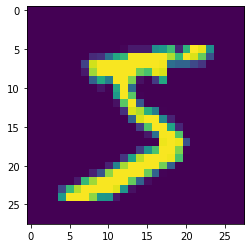

In [ ]:

plt.imshow(single_image)

In [ ]:
from tensorflow.keras.utils import to_categorical     #to_categorical    Return:A binary matrix representation of the input. The classes axis is placed last.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape    # 6000 lables on numbers there

(60000,)

In [ ]:
y_example=to_categorical(y_train)   #Converts a class vector (integers) to binary class matrix   (one_hot encoding)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_cat_test=to_categorical(y_test,num_classes=10)
y_cat_train=to_categorical(y_train,10)

In [ ]:
single_image.min()

0

In [ ]:
single_image.max()

255

In [ ]:
x_train=x_train/255
x_test=x_test/255  

In [ ]:
scaled_image=x_train[0]  #scaled image between 0 to 1

**color chanels:**

in color image, we normaly have 3 chanels red,green,blue (RGB)


In [ ]:
#batch_size,width,hight,color_chanels  
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)   #x_test.shape 10000

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#fully-connected 
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output layer softmax--> multi class
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)     #stop training as soon as the validation error reaches a minimum
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2819 - accuracy: 0.9166 - val_loss: 0.0643 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0431 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0443 - val_accuracy: 0.9843


In [ ]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141369,0.957683,0.064293,0.9801
1,0.048084,0.985083,0.043059,0.9863
2,0.031622,0.989650,0.044258,0.9843


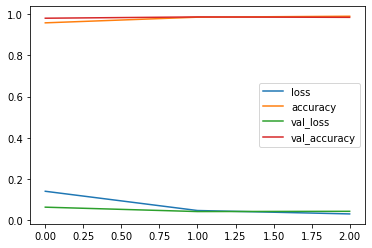

In [ ]:
#metrics[['loss','val_loss']].plot
metrics.plot()

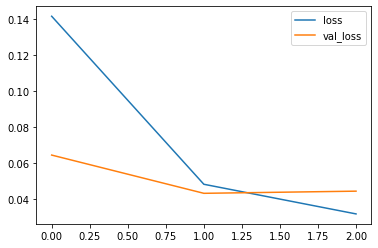

In [ ]:
metrics[['loss','val_loss']].plot()

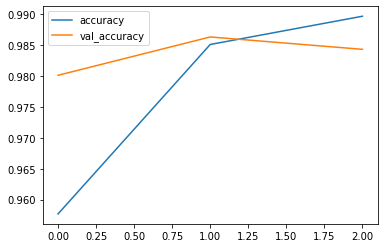

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test ,verbose=0)   #last epoch  val_loss , val_accuracy

[0.044257666915655136, 0.9843000173568726]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
prediction=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
confusion_matrix(y_test,prediction)

array([[ 974,    0,    1,    0,    0,    0,    2,    1,    1,    1],
       [   1, 1125,    2,    2,    0,    3,    2,    0,    0,    0],
       [   1,    2, 1016,    5,    1,    0,    1,    4,    1,    1],
       [   0,    0,    1, 1005,    0,    2,    0,    0,    2,    0],
       [   0,    0,    2,    0,  963,    0,    1,    0,    1,   15],
       [   1,    0,    0,    4,    0,  886,    1,    0,    0,    0],
       [   5,    2,    0,    0,    1,   17,  933,    0,    0,    0],
       [   0,    2,    8,    2,    0,    0,    0, 1008,    1,    7],
       [   3,    0,    7,    6,    0,    7,    0,    5,  937,    9],
       [   0,    1,    0,    2,    2,    5,    0,    3,    0,  996]])

In [ ]:
import seaborn as sns

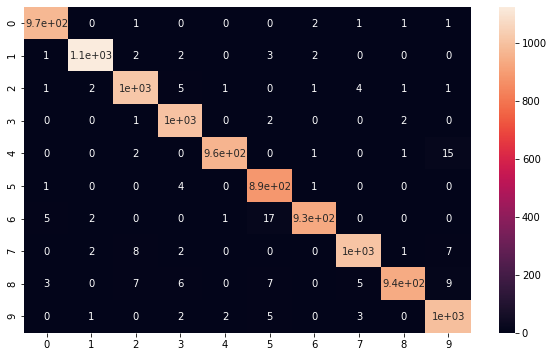

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction), annot=True)

In [ ]:
my_number=x_test[0]

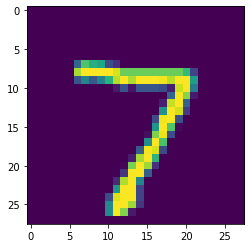

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
#num_images,with,hight,color_chanels
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

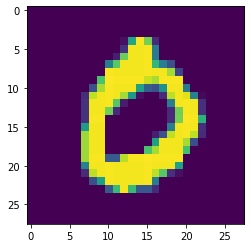

In [ ]:
my_number_2=x_test[3]
plt.imshow(my_number_2.reshape(28,28))

In [ ]:
model.predict_classes(my_number_2.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])